In [67]:
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
#caliberating the time taken by program to read csv file 

timein=time.time()
df1=pd.read_csv('D:\python_coding\TSL\dataset\promise_data\CM1 Software defect prediction.csv')[2:]
timeout=time.time()
print('The time taken to execute the Program was',timeout-timein,'seconds')

The time taken to execute the Program was 0.008155107498168945 seconds


In [69]:
df1

,attribute loc numeric,attribute v(g) numeric,attribute ev(g) numeric,attribute iv(g) numeric,attribute n numeric,attribute v numeric,attribute l numeric,attribute d numeric,attribute i numeric,attribute e numeric,...,attribute lOCode numeric,attribute lOComment numeric,attribute lOBlank numeric,attribute locCodeAndComment numeric,attribute uniq_Op numeric,attribute uniq_Opnd numeric,attribute total_Op numeric,attribute total_Opnd numeric,attribute branchCount numeric,"attribute defects {false,true}"
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False
5,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False
6,7.0,1.0,1.0,1.0,11.0,34.87,0.50,2.00,17.43,69.74,...,0,0,1,0,4.0,5.0,6.0,5.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,47.0,3.0,1.0,3.0,256.0,1563.78,0.04,28.00,55.85,43785.90,...,2,13,2,0,23.0,46.0,144.0,112.0,5.0,True
494,24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,...,1,7,4,0,22.0,23.0,67.0,40.0,7.0,True
495,82.0,11.0,3.0,10.0,475.0,3155.83,0.02,44.71,70.59,141084.24,...,9,59,35,0,32.0,68.0,285.0,190.0,21.0,True
496,10.0,2.0,1.0,1.0,32.0,150.41,0.15,6.50,23.14,977.69,...,1,12,4,0,13.0,13.0,19.0,13.0,3.0,True


In [70]:
df1.columns = df1.columns.str.replace('attribute','a_')
df1.columns = df1.columns.str.replace('numeric','_num')
df1

,a_ loc _num,a_ v(g) _num,a_ ev(g) _num,a_ iv(g) _num,a_ n _num,a_ v _num,a_ l _num,a_ d _num,a_ i _num,a_ e _num,...,a_ lOCode _num,a_ lOComment _num,a_ lOBlank _num,a_ locCodeAndComment _num,a_ uniq_Op _num,a_ uniq_Opnd _num,a_ total_Op _num,a_ total_Opnd _num,a_ branchCount _num,"a_ defects {false,true}"
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False
5,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False
6,7.0,1.0,1.0,1.0,11.0,34.87,0.50,2.00,17.43,69.74,...,0,0,1,0,4.0,5.0,6.0,5.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,47.0,3.0,1.0,3.0,256.0,1563.78,0.04,28.00,55.85,43785.90,...,2,13,2,0,23.0,46.0,144.0,112.0,5.0,True
494,24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,...,1,7,4,0,22.0,23.0,67.0,40.0,7.0,True
495,82.0,11.0,3.0,10.0,475.0,3155.83,0.02,44.71,70.59,141084.24,...,9,59,35,0,32.0,68.0,285.0,190.0,21.0,True
496,10.0,2.0,1.0,1.0,32.0,150.41,0.15,6.50,23.14,977.69,...,1,12,4,0,13.0,13.0,19.0,13.0,3.0,True


In [71]:
a = df1.drop('a_ defects {false,true}', axis = 1)
a

,a_ loc _num,a_ v(g) _num,a_ ev(g) _num,a_ iv(g) _num,a_ n _num,a_ v _num,a_ l _num,a_ d _num,a_ i _num,a_ e _num,...,a_ t _num,a_ lOCode _num,a_ lOComment _num,a_ lOBlank _num,a_ locCodeAndComment _num,a_ uniq_Op _num,a_ uniq_Opnd _num,a_ total_Op _num,a_ total_Opnd _num,a_ branchCount _num
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,163.15,1,0,6,0,15.0,15.0,44.0,19.0,9.0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,191.55,0,0,3,0,16.0,8.0,31.0,16.0,7.0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0
5,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0
6,7.0,1.0,1.0,1.0,11.0,34.87,0.50,2.00,17.43,69.74,...,3.87,0,0,1,0,4.0,5.0,6.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,47.0,3.0,1.0,3.0,256.0,1563.78,0.04,28.00,55.85,43785.90,...,2432.55,2,13,2,0,23.0,46.0,144.0,112.0,5.0
494,24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,...,624.53,1,7,4,0,22.0,23.0,67.0,40.0,7.0
495,82.0,11.0,3.0,10.0,475.0,3155.83,0.02,44.71,70.59,141084.24,...,7838.01,9,59,35,0,32.0,68.0,285.0,190.0,21.0
496,10.0,2.0,1.0,1.0,32.0,150.41,0.15,6.50,23.14,977.69,...,54.32,1,12,4,0,13.0,13.0,19.0,13.0,3.0


In [72]:

b = df1['a_ defects {false,true}']
b


2      False
3      False
4      False
5      False
6      False
       ...  
493     True
494     True
495     True
496     True
497     True
Name: a_ defects {false,true}, Length: 496, dtype: bool

In [73]:
#input
X = df1.iloc[:,0:21]
X.head(10)

,a_ loc _num,a_ v(g) _num,a_ ev(g) _num,a_ iv(g) _num,a_ n _num,a_ v _num,a_ l _num,a_ d _num,a_ i _num,a_ e _num,...,a_ t _num,a_ lOCode _num,a_ lOComment _num,a_ lOBlank _num,a_ locCodeAndComment _num,a_ uniq_Op _num,a_ uniq_Opnd _num,a_ total_Op _num,a_ total_Opnd _num,a_ branchCount _num
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,163.15,1,0,6,0,15.0,15.0,44.0,19.0,9.0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,191.55,0,0,3,0,16.0,8.0,31.0,16.0,7.0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0
5,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0
6,7.0,1.0,1.0,1.0,11.0,34.87,0.50,2.00,17.43,69.74,...,3.87,0,0,1,0,4.0,5.0,6.0,5.0,1.0
7,12.0,2.0,1.0,2.0,23.0,94.01,0.16,6.43,14.62,604.36,...,33.58,0,0,7,0,10.0,7.0,14.0,9.0,3.0
8,25.0,5.0,5.0,5.0,107.0,548.83,0.07,14.25,38.51,7820.87,...,434.49,12,16,13,0,15.0,20.0,69.0,38.0,9.0
9,46.0,15.0,3.0,1.0,239.0,1362.41,0.04,22.30,61.10,30377.95,...,1687.66,8,35,22,0,15.0,37.0,129.0,110.0,29.0
10,34.0,5.0,5.0,1.0,155.0,856.15,0.05,20.76,41.24,17773.08,...,987.39,11,28,16,0,19.0,27.0,96.0,59.0,9.0
11,10.0,2.0,1.0,1.0,35.0,143.06,0.11,9.00,15.90,1287.55,...,71.53,2,4,4,0,9.0,8.0,19.0,16.0,3.0


In [74]:
#output
y1 = df1.iloc[:,21]
#to check the entries of y1
y1.unique()

array([False,  True])

In [75]:
#standardisation of dataset

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X),columns=X.columns)


In [76]:
X

,a_ loc _num,a_ v(g) _num,a_ ev(g) _num,a_ iv(g) _num,a_ n _num,a_ v _num,a_ l _num,a_ d _num,a_ i _num,a_ e _num,...,a_ t _num,a_ lOCode _num,a_ lOComment _num,a_ lOBlank _num,a_ locCodeAndComment _num,a_ uniq_Op _num,a_ uniq_Opnd _num,a_ total_Op _num,a_ total_Opnd _num,a_ branchCount _num
0,-0.134714,-0.047799,-0.408557,-0.098449,-0.368781,-0.351554,-0.221321,-0.417064,-0.164129,-0.238967,...,-0.238967,-0.328369,-0.476935,-0.278850,0.0,-0.026712,-0.310995,-0.331571,-0.422935,-0.025271
1,-0.228263,-0.167538,0.410759,-0.281335,-0.441151,-0.406911,-0.564153,0.007275,-0.680128,-0.235160,...,-0.235160,-0.445796,-0.476935,-0.428914,0.0,0.077611,-0.517335,-0.427911,-0.457422,-0.157910
2,-0.134714,0.071940,0.956970,-0.281335,-0.328073,-0.329680,-0.564153,0.094101,-0.504250,-0.216158,...,-0.216158,-0.445796,-0.476935,-0.428914,0.0,0.077611,-0.399427,-0.316750,-0.342464,0.107368
3,-0.134714,0.071940,0.956970,-0.281335,-0.328073,-0.329680,-0.564153,0.094101,-0.504250,-0.216158,...,-0.216158,-0.445796,-0.476935,-0.428914,0.0,0.077611,-0.399427,-0.316750,-0.342464,0.107368
4,-0.532300,-0.526754,-0.408557,-0.464221,-0.603983,-0.513689,2.452773,-0.906686,-0.572978,-0.260318,...,-0.260318,-0.445796,-0.476935,-0.528958,0.0,-1.174264,-0.605766,-0.613179,-0.583876,-0.555828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,0.403198,-0.287276,-0.408557,-0.098449,0.504183,0.390162,-0.701286,0.790669,0.466597,0.065238,...,0.065238,-0.210942,0.026054,-0.478936,0.0,0.807872,0.602795,0.409503,0.646176,-0.290550
492,-0.134714,-0.167538,0.137654,-0.098449,-0.169763,-0.186912,-0.632720,0.211610,-0.213375,-0.177121,...,-0.177121,-0.328369,-0.206094,-0.378893,0.0,0.703549,-0.075179,-0.161124,-0.181523,-0.157910
493,1.221759,0.670633,0.137654,1.181755,1.494748,1.331340,-0.838419,1.881546,0.865434,0.789823,...,0.789823,0.611047,1.805861,1.171775,0.0,1.746779,1.251291,1.454419,1.542850,0.770565
494,-0.462138,-0.407015,-0.408557,-0.464221,-0.508998,-0.445385,0.052946,-0.612913,-0.418476,-0.253556,...,-0.253556,-0.328369,-0.012637,-0.378893,0.0,-0.235358,-0.369950,-0.516840,-0.491910,-0.423189


In [77]:
y = pd.DataFrame(data=y1, columns=['a_ defects {false,true}'])

In [78]:
y

,"a_ defects {false,true}"
2,False
3,False
4,False
5,False
6,False
...,...
493,True
494,True
495,True
496,True


In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((332, 21), (332, 1), (164, 21), (164, 1))

In [80]:
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras import Sequential

In [81]:
#defining layers in the model
model=Sequential()
model.add(tf.keras.layers.Dense(50, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [82]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [83]:
#the model name will change after every run
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                1100      
                                                                 
 dropout_9 (Dropout)         (None, 50)                0         
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dropout_10 (Dropout)        (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 50)                2550      
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [84]:
#fitting the model in training dataset
history=model.fit(X_train,y_train,batch_size=10,epochs=50,validation_split=0.1)

Epoch 1/50
30/30 [==============================] - 1s 11ms/step - loss: 0.4386 - accuracy: 0.8691 - val_loss: 0.2700 - val_accuracy: 0.9412
Epoch 2/50
30/30 [==============================] - 0s 6ms/step - loss: 0.3148 - accuracy: 0.8960 - val_loss: 0.2386 - val_accuracy: 0.9412
Epoch 3/50
30/30 [==============================] - 0s 5ms/step - loss: 0.3211 - accuracy: 0.8993 - val_loss: 0.2258 - val_accuracy: 0.9412
Epoch 4/50
30/30 [==============================] - 0s 6ms/step - loss: 0.3228 - accuracy: 0.8993 - val_loss: 0.2248 - val_accuracy: 0.9412
Epoch 5/50
30/30 [==============================] - 0s 7ms/step - loss: 0.2964 - accuracy: 0.8993 - val_loss: 0.2311 - val_accuracy: 0.9412
Epoch 6/50
30/30 [==============================] - 0s 8ms/step - loss: 0.3089 - accuracy: 0.8993 - val_loss: 0.2197 - val_accuracy: 0.9412
Epoch 7/50
30/30 [==============================] - 0s 6ms/step - loss: 0.3000 - accuracy: 0.9027 - val_loss: 0.1988 - val_accuracy: 0.9412
Epoch 8/50
30/30 [=

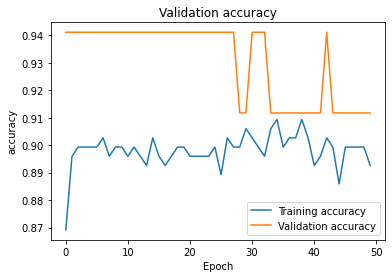

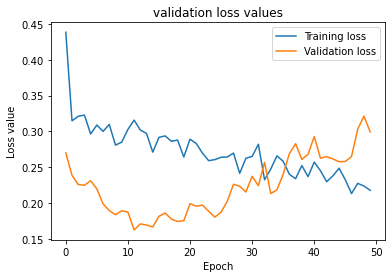

In [85]:
#plotting the training and validation dataset 
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [86]:
accuracy = model.evaluate(X_test, y_test)




6/6 [==============================] - 0s 3ms/step - loss: 0.2935 - accuracy: 0.9024


In [87]:
# Prediction of the test data
pred = model.predict(X_test)
y_pred = pred.argmax(axis=-1)

In [88]:
# Prediction accuracy with the confusion matrix
labels = ['False', 'True']
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=labels, columns=labels) # printing confusion matrix

              precision    recall  f1-score   support

       False       0.90      1.00      0.95       148
        True       0.00      0.00      0.00        16

    accuracy                           0.90       164
   macro avg       0.45      0.50      0.47       164
weighted avg       0.81      0.90      0.86       164



c:\Users\deepak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\deepak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\deepak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,False,True
False,148,0
True,16,0
